<a href="https://colab.research.google.com/github/kingkong135/Viblo/blob/master/X%E1%BB%AD%20l%C3%BD%20%E1%BA%A3nh/Tu%E1%BA%A7n%204/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
root_path = "drive/My Drive/Colab Notebooks/image processing/week 4/"

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 

In [0]:
%matplotlib inline

In [0]:
plt.rcParams['figure.figsize'] = [8,6]

(-0.5, 181.5, 247.5, -0.5)

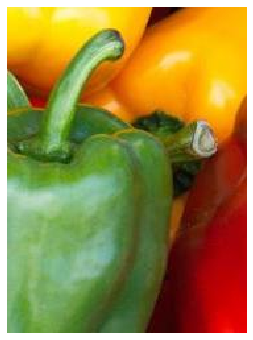

In [0]:
image = cv2.imread(root_path + "pepper.jpg")
plt.imshow(image[:,:,::-1])
plt.axis("off")

In [0]:
def rgb_filter(image, kernel, mode='full', boundary='fill'):
    b,g,r = cv2.split(image)
    b = signal.correlate2d(b, kernel, mode=mode, boundary=boundary)
    g = signal.correlate2d(g, kernel, mode=mode, boundary=boundary)
    r = signal.correlate2d(r, kernel, mode=mode, boundary=boundary)
    output = cv2.merge([b,g,r])
    return output


Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(-0.5, 201.5, 267.5, -0.5)

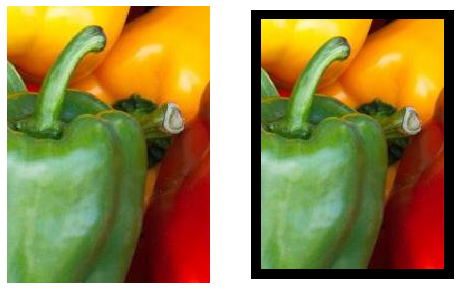

In [0]:
# make a kernel 
kernel = np.zeros((21,21), dtype = 'uint8')
kernel[10,10] = 1

# do cross corrlation
fimage = rgb_filter(image, kernel, mode='full', boundary='fill')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(-0.5, 201.5, 267.5, -0.5)

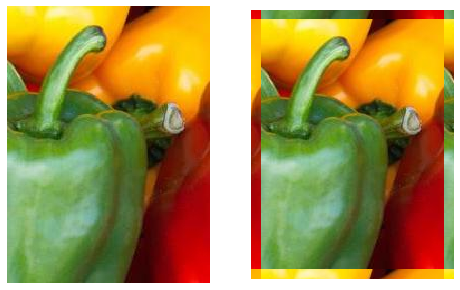

In [0]:
#do cross correlation
fimage = rgb_filter(image, kernel, mode='full', boundary='wrap')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (268, 202, 3)


(-0.5, 201.5, 267.5, -0.5)

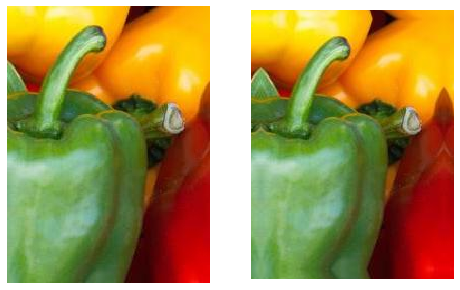

In [0]:
#symmetry boundary
fimage = rgb_filter(image, kernel, mode='full', boundary='symm')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (228, 162, 3)


(-0.5, 161.5, 227.5, -0.5)

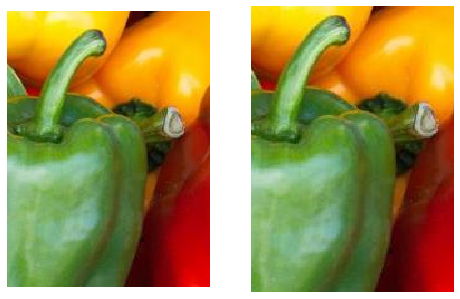

In [0]:
#valid filtering
fimage = rgb_filter(image, kernel, mode='valid', boundary='fill')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##should decrease

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

Original shape:  (248, 182, 3)
Filtered shape:  (248, 182, 3)


(-0.5, 181.5, 247.5, -0.5)

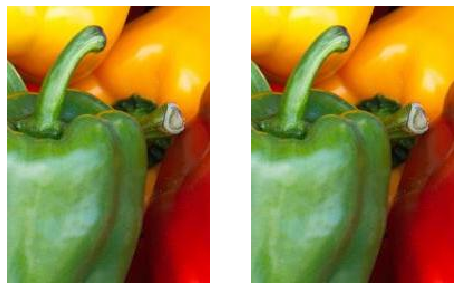

In [0]:
#same filtering
fimage = rgb_filter(image, kernel, mode='same', boundary='fill')

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)  ##equal

#view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

# Using opencv

Original shape:  (248, 182, 3)
Filtered shape:  (248, 182, 3)


(-0.5, 181.5, 247.5, -0.5)

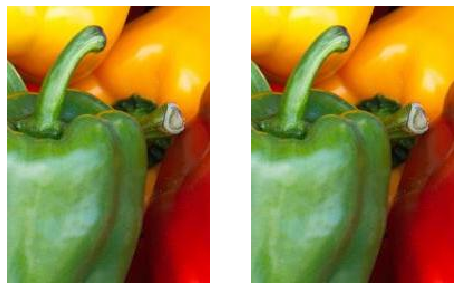

In [0]:
fimage = cv2.filter2D(image, -1, kernel, cv2.BORDER_DEFAULT)

#check the size of image
print("Original shape: ", image.shape)
print("Filtered shape: ", fimage.shape)

# view the image
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis('off')
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis('off')

# Averaging

(-0.5, 181.5, 247.5, -0.5)

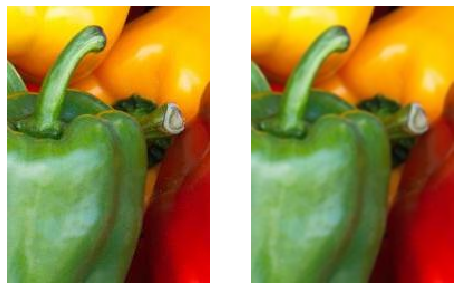

In [0]:
kernel = 1/9 * np.array([
               [1, 1, 1],
               [1, 1, 1],
               [1, 1, 1]
])

# averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

# Gaussian Filtering

(-0.5, 181.5, 247.5, -0.5)

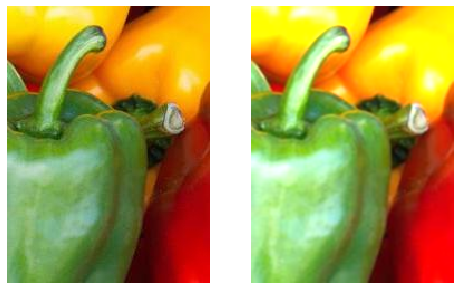

In [0]:
#a gaussian kernel

kernel = 1/12 * np.array([
                [1, 2, 1],
                [2, 4, 2],
                [1, 2, 1]
])

#averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


(-0.5, 181.5, 247.5, -0.5)

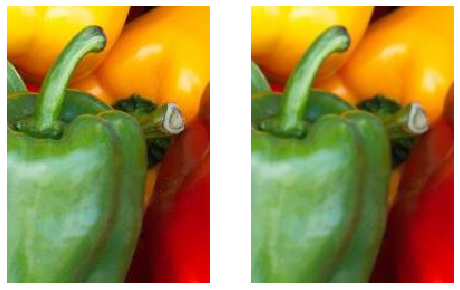

In [0]:
#or using GaussianBlur

fimage = cv2.GaussianBlur(image, (3,3), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")


(-0.5, 181.5, 247.5, -0.5)

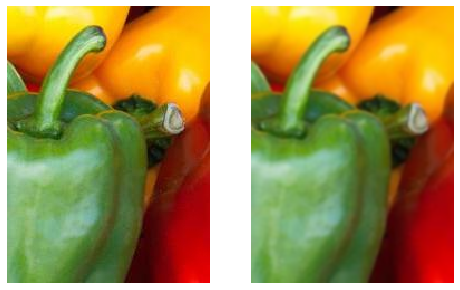

In [0]:
fimage = cv2.GaussianBlur(image, (5, 5), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

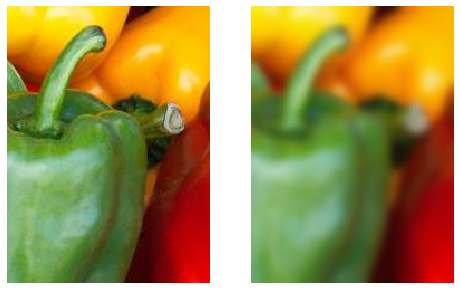

In [0]:
fimage = cv2.GaussianBlur(image, (21,21), 0) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

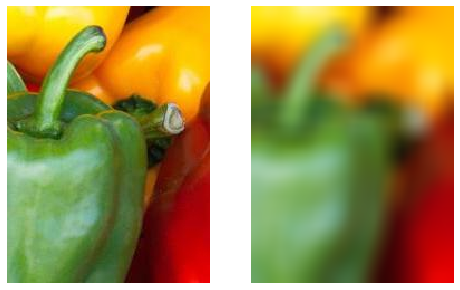

In [0]:
fimage = cv2.GaussianBlur(image, (21, 21), 20) #image, kernel size, sigma
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

# Median filtering

(-0.5, 181.5, 247.5, -0.5)

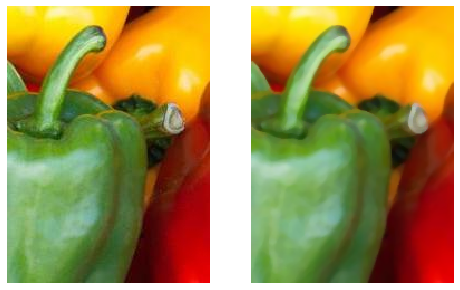

In [0]:
fimage = cv2.medianBlur(image, 5) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

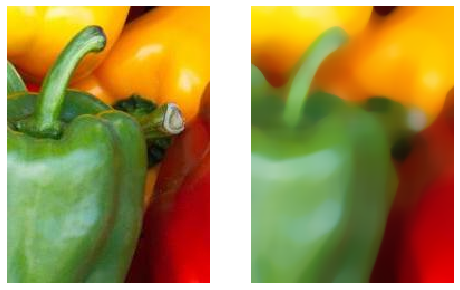

In [0]:
fimage = cv2.medianBlur(image, 21) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

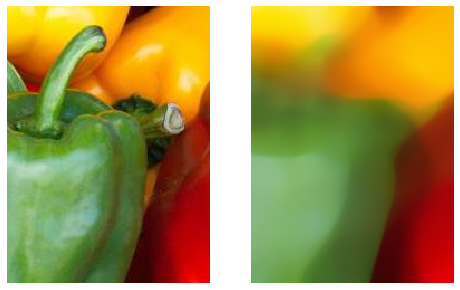

In [0]:
fimage = cv2.medianBlur(image, 45) #image, kernel size
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

# Unsharp masking

$dst = \alpha \cdot src1 + \beta \cdot src2 + \gamma$

Where `src2` is a blurred image

Text(0.5, 1.0, 'sharpen')

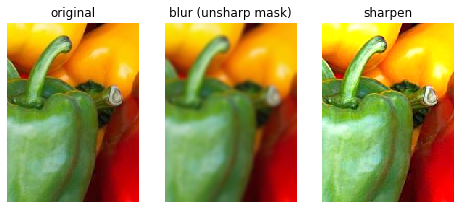

In [0]:
blur = cv2.GaussianBlur(image, (7,7), 3.0)
fimage = cv2.addWeighted(image, 1.7, blur, -0.5, 0)
# fimage = image * 1.7 - 0.5 * blur + 0
plt.subplot(1, 3, 1); plt.imshow(image[:,:,::-1]); plt.axis("off"); plt.title("original")
plt.subplot(1, 3, 2); plt.imshow(blur[:,:,::-1]); plt.axis("off"); plt.title("blur (unsharp mask)")
plt.subplot(1, 3, 3); plt.imshow(fimage[:,:,::-1]); plt.axis("off"); plt.title("sharpen")

## Arbitrary filters


(-0.5, 181.5, 247.5, -0.5)

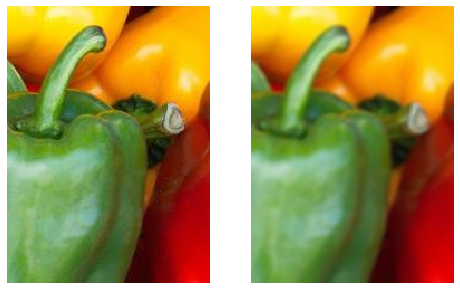

In [0]:
#a gaussian kernel

kernel = np.random.rand(5,5)
kernel = kernel/sum(kernel.ravel())

#averaging for a smoothing effect
fimage = cv2.filter2D(image, -1, kernel)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")

(-0.5, 181.5, 247.5, -0.5)

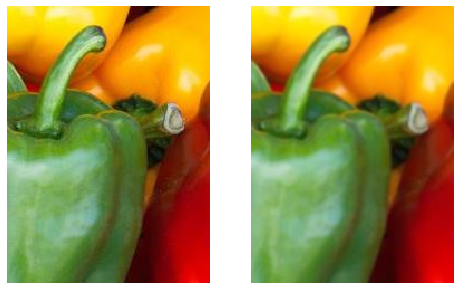

In [0]:
fimage = cv2.GaussianBlur(image, (5,5), 1.0, cv2.BORDER_REFLECT)
plt.subplot(1, 2, 1); plt.imshow(image[:,:,::-1]); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(fimage[:,:,::-1]); plt.axis("off")